In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_data.csv', sep=',', encoding='latin1')

# In tên cột và 5 dòng đầu để kiểm tra
print("Tên các cột trong file:", df.columns.tolist())
print("5 dòng đầu của dữ liệu:\n", df.head())




Tên các cột trong file: ['Unnamed: 0', 'brand', 'ram', 'storage', 'battery', 'charging', 'price']
5 dòng đầu của dữ liệu:
    Unnamed: 0    brand  ram  storage  battery  charging       price
0           0  Samsung  6.0    128.0   5000.0      25.0   6590000.0
1           1   realme  6.0    128.0   5600.0      45.0   4690000.0
2           2   iPhone  8.0    128.0   4500.0      20.0  16590000.0
3           3   iPhone  8.0    256.0   4500.0      20.0  19490000.0
4           4   iPhone  8.0    512.0   4500.0      20.0  24590000.0


1. Correlation Heatmap

Là một biểu đồ nhiệt hiển thị mức độ tương quan tuyến tính giữa các biến số trong tập dữ liệu.
Giá trị từ -1 (tương quan nghịch) đến 1 (tương quan thuận), với 0 là không tương quan.
Màu sắc thể hiện cường độ tương quan, ví dụ: đỏ đậm cho tương quan mạnh.
Trong dữ liệu này, nó giúp xem "price" liên quan thế nào đến "ram", "storage",...
Hữu ích để phát hiện các mối quan hệ tiềm ẩn giữa các đặc điểm kỹ thuật.

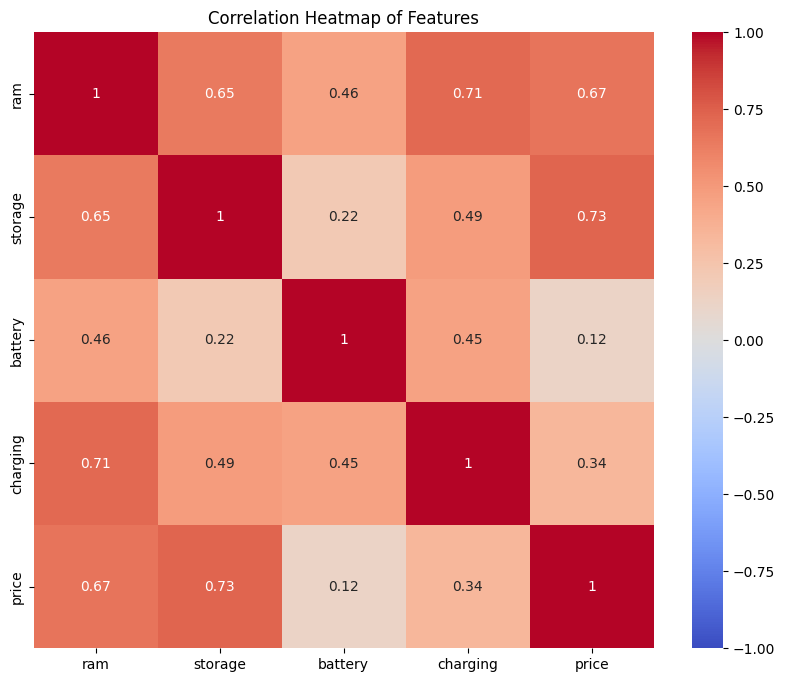

In [4]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['ram', 'storage', 'battery', 'charging', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

2. Distribution Plots

Biểu đồ hiển thị phân phối của từng biến số, thường kèm đường cong mật độ (KDE).
Cho thấy dữ liệu phân bố đều, lệch trái/phải hay có nhiều đỉnh không.
Ví dụ, "price" có thể lệch phải do một số điện thoại giá cao bất thường.
Trong dữ liệu này, nó giúp hiểu đặc điểm thống kê của "ram", "battery",...
Hỗ trợ nhận diện các giá trị ngoại lai hoặc xu hướng chung.

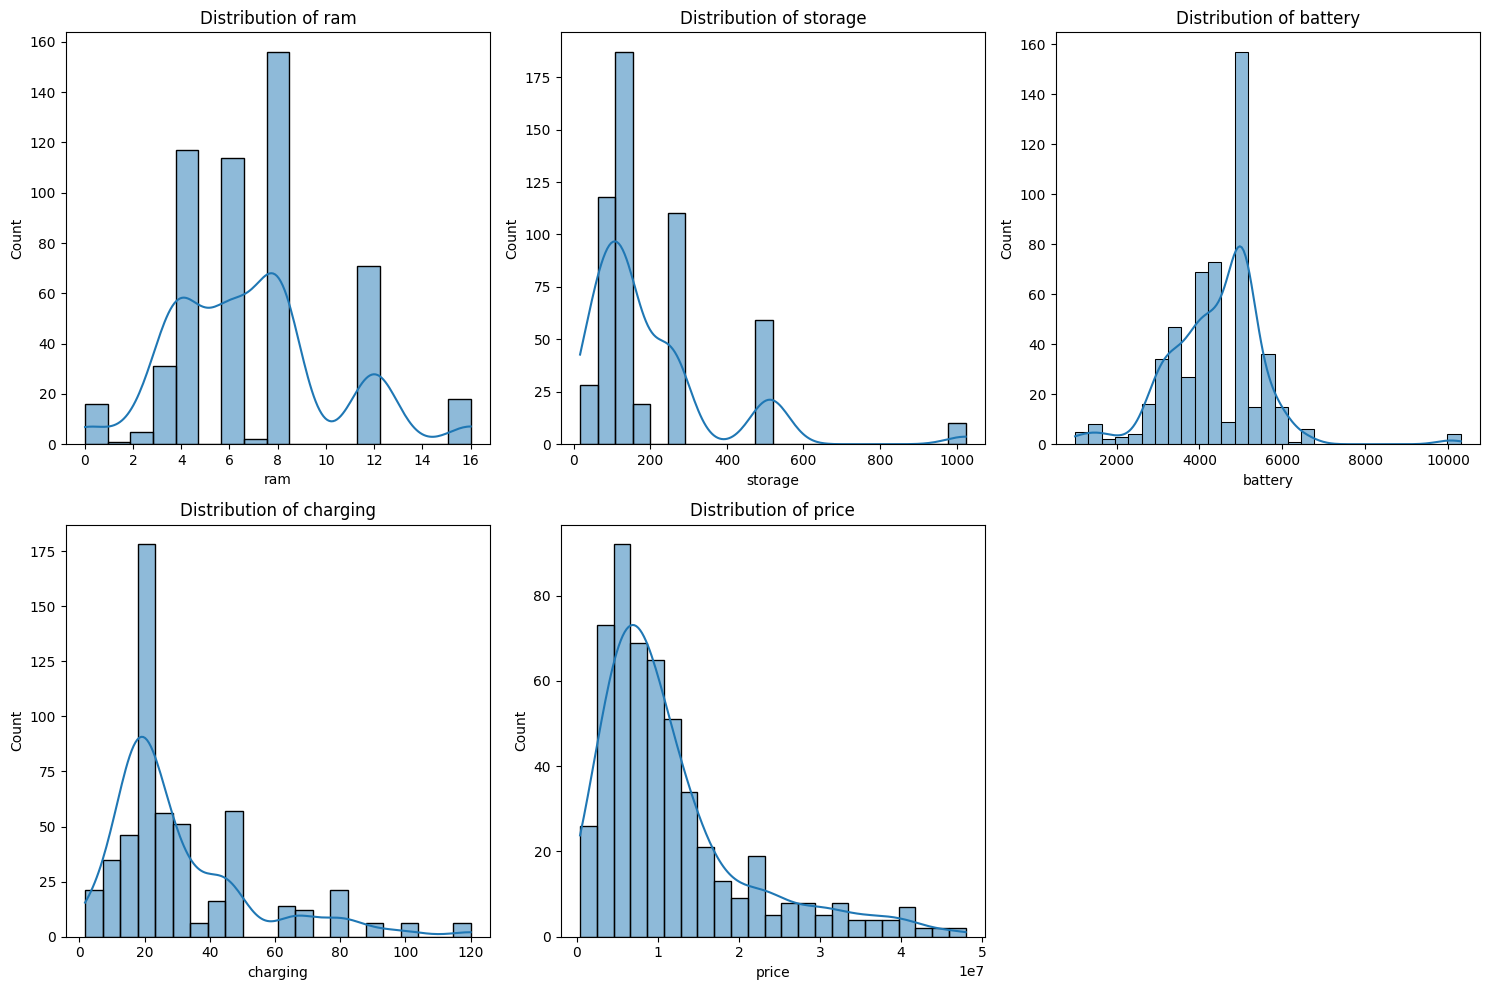

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['ram', 'storage', 'battery', 'charging', 'price']
for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribution of {feature}')
axes[1, 2].axis('off')  # Tắt subplot thừa
plt.tight_layout()
plt.show()

3. Scatter Plot với lmplot (Price vs RAM, colored by Brand)

Là biểu đồ phân tán vẽ "price" theo "ram", với màu sắc phân loại theo "brand".
Giúp xem mối quan hệ giữa RAM và giá cả thay đổi thế nào giữa các thương hiệu.
Có thể thêm đường hồi quy (regression line) để đánh giá xu hướng tuyến tính.
Trong dữ liệu này, nó cho thấy iPhone có giá cao hơn Samsung ở cùng mức RAM không.
Hữu ích để so sánh chiến lược định giá của các hãng điện thoại.

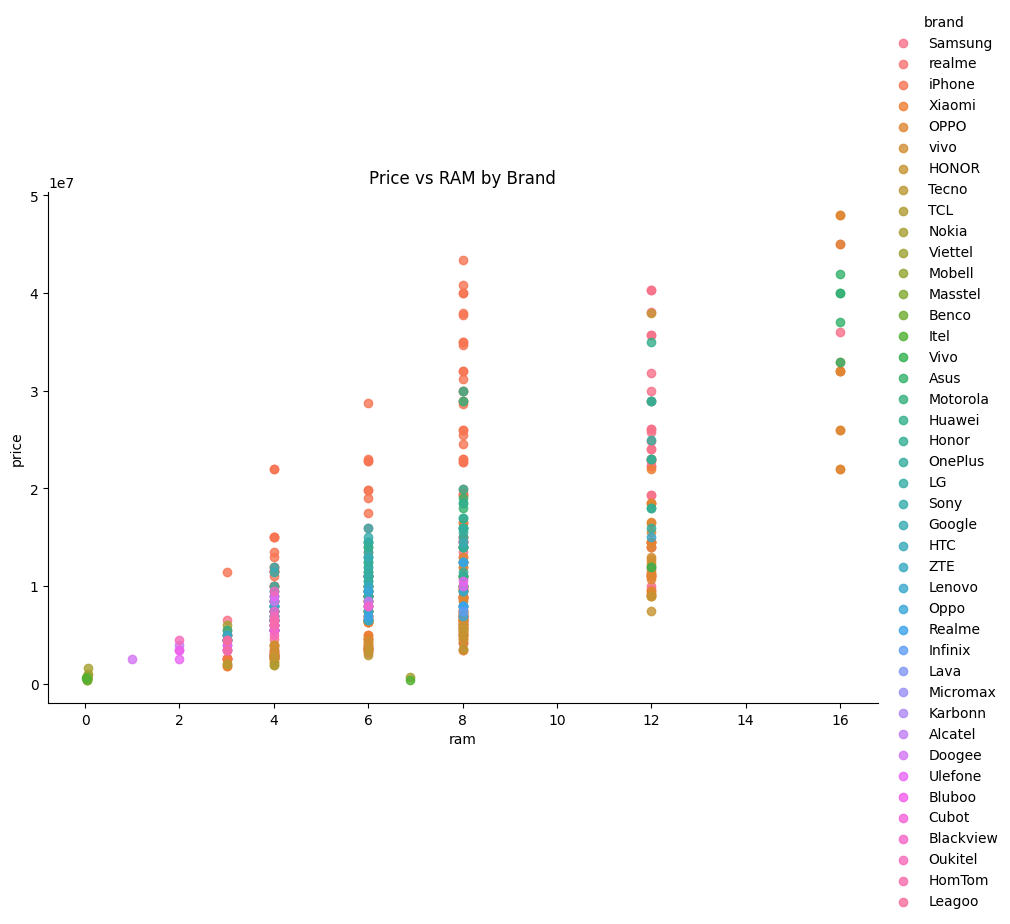

In [11]:
sns.lmplot(x='ram', y='price', hue='brand', data=df, fit_reg=False, height=6, aspect=1.5)
plt.title('Price vs RAM by Brand')
plt.show()